In [7]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib
import matplotlib.pyplot as plt
import yaml

from evasion_guidance.scripts.pycubicspline import *
from evasion_guidance.scripts.evasion_risk import EvasionRisk
from evasion_guidance.scripts.utils import visualiza_radar_config

%matplotlib widget
matplotlib.rcParams['figure.figsize'] = (8, 8)

## Load RRT* path ##

In [8]:
with open("../../data_rrt/config.yaml","r") as file_object:
    config = yaml.load(file_object,Loader=yaml.SafeLoader)

In [9]:
data_idx = 0
data = np.load(f'../../data_rrt/episode_{data_idx}.npy',allow_pickle='TRUE').item()
radar_locs = data['radar_locations']
path_rrt = data['state_history']
inputs = data['input_history']
node_sequence = data['node_sequence']
x_rrt, y_rrt, yaw_rrt, k_rrt, travel_rrt, u_rrt = calc_2d_spline_interpolation(path_rrt[:, 0], path_rrt[:, 1], v=30.0, num=2*len(path_rrt))

# fig, ax = plt.subplots()
# visualiza_radar_config(radar_locs, radius=config['env']['radar_radius'], xlim=[0, config['env']['map_range']], ylim=[0, config['env']['map_range']])

# ax.scatter(x, y, s=10, c='g', alpha=0.8, label='interpolated')
# ax.scatter(node_sequence[:, 0], node_sequence[:, 1], s=100, c='g', alpha=0.5, label='node')
# ax.scatter(path[:, 0], path[:, 1], s=10, c='b', alpha=0.5, label='rrt path')
# ax.scatter(path[-1, 0], path[-1, 1], s=100, c='r', alpha=0.5, label='goal')
# ax.set_xlim(0.0, config['env']['map_range'])
# ax.set_ylim(0.0, config['env']['map_range'])
# ax.legend()
# plt.show()


In [10]:
risk_radius = config['env']['radar_radius']
risk_evaluator = EvasionRisk(radar_locs, 5, risk_radius)
_, risks = risk_evaluator.evalute_trajectory_risk(np.asarray([[x_rrt[i], y_rrt[i], yaw_rrt[i]] for i in range(len(x_rrt))]), u_rrt, True)
print("RRT path risk: ", sum(risks) / (len(risks)))

RRT path risk:  0.2619105461370568


### Load refined path ###

In [11]:
path_mcmc = np.load(f'../../data_mcmc/episode_{data_idx}.npy',allow_pickle='TRUE')
x_mcmc, y_mcmc, yaw_mcmc, k_mcmc, travel_mcmc, u_mcmc = calc_2d_spline_interpolation(path_mcmc[:, 0], path_mcmc[:, 1], v=30.0, num=100)
_, risks = risk_evaluator.evalute_trajectory_risk(np.asarray([[x_mcmc[i], y_mcmc[i], yaw_mcmc[i]] for i in range(len(x_mcmc))]), u_mcmc, True)
print("MCMC path risk: ", sum(risks) / (len(risks)))

MCMC path risk:  0.20049900323380296


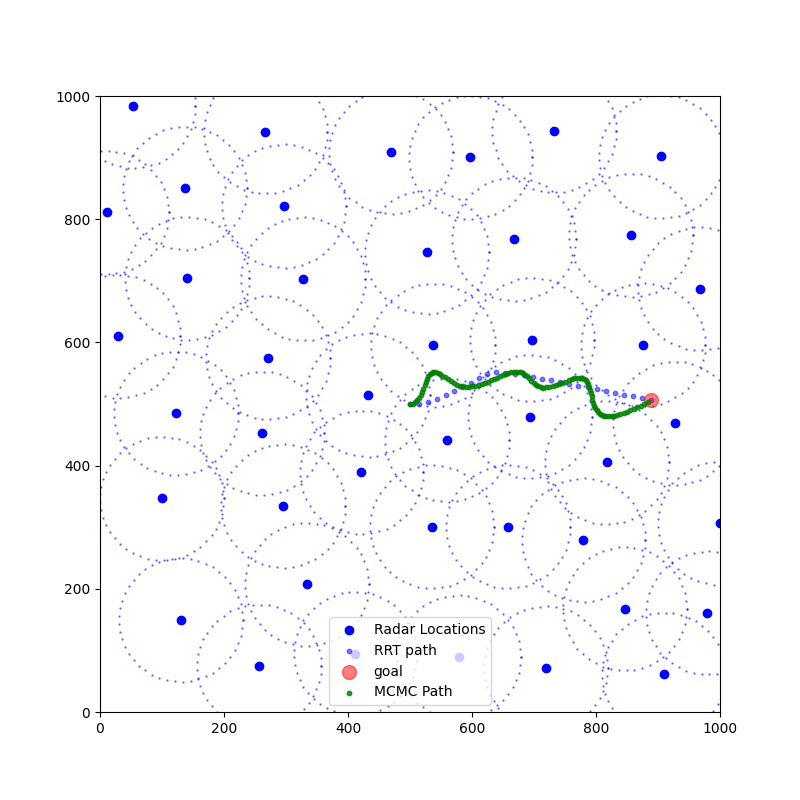

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

In [12]:
fig, ax = plt.subplots()
visualiza_radar_config(radar_locs, radius=config['env']['radar_radius'], xlim=[0, config['env']['map_range']], ylim=[0, config['env']['map_range']])

ax.scatter(path_rrt[:, 0], path_rrt[:, 1], s=10, c='b', alpha=0.5, label='RRT path')
ax.scatter(path_rrt[-1, 0], path_rrt[-1, 1], s=100, c='r', alpha=0.5, label='goal')

# ax.scatter(path_mcmc[:, 0], path_mcmc[:, 1], s=10, c='g', alpha=0.5, label='mcmc path')
ax.scatter(x_mcmc, y_mcmc, s=10, c='g', alpha=0.8, label='MCMC Path')

ax.set_xlim(0.0, config['env']['map_range'])
ax.set_ylim(0.0, config['env']['map_range'])
ax.legend()
plt.show()
